# Homework 2: Building ML Model to Classify Handwritten Digits

Welcome to the second homework task.

**Instructions:**

- We highly recommend you use this ***'Codio'*** platform to finish this assignment. If you download this file, don't upload a new ipynb file with your answers.
- Please keep in mind that your answer should be typed in the cell that are marked with "**Q**".   
  You can break your code into different cells or create new cells to test your code, but your final output/answers must be typed in the marked cell.   
- After you finishing the assignment, please check whether you have saved your assignment. You can save assignment using CLTR-S or File -> Save Checkpoint
- Once you complete your assignment you can submit by clicking on Education -> Marked as Complete 

**You will learn:**
- Import inbuilt dataset from ***sk-learn***;
- Understand the imaging data;
- Plot pictures in python using ***matplotlib***;
- Apply ***sk-learn*** machine learning model to perform classification on image data;
- Use your model to make classification prediction;
- Evaluate your classifier model by accuracy;.

## Recognizing Handwritten Digits  (60 points) 
**Preparation**

We start with importing our libraries! 

In python programming, we always import all the packages at the beginning of the program. There are two advantages of importing packages in the beginning. Firstly, after we import the packages, we can call the functions in the packages in any position of the program. Secondly, it can help us to keep the program in a clear format. 

Run the cell below to import the packages we are going to use in the handwritten digits classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 1. Data Gathering

The handwritten digits are common in real lives and it's possible to create your own handwritten digits dataset. However, one important thing to keep in mind is that the input image should have the same resolution(size), in other worlds, have the same dimentionality. 

Luckily, the basic machine learning library of Python, ***sciket-learn***, has built up a handwritten digits dataset, ***The Digit Dataset***, for beginners to perform machine learning excercises. You can find official description of the dataset [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html).

- You can use the following codes to import digit dataset from sklearn library and assign the dataset to variable 'digits'.
- The step that assigning the dataset to variable 'digits' can be considered as making a copy of the dataset from sk-learn to your own program.
- After the assigning step, you can use the dataset easily in other cells by calling the variable 'digits'.

In [2]:
# run this cell to import the dataset
from sklearn.datasets import load_digits 
digits = load_digits()

In [3]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

### 2. Understanding Data

<br/> 
**How to use 'digits'**

After we assgin the dataset to the varialbe 'digits', we can call the content in the dataset from 'digits'.

The dataset is storaged in 4 classes, data, images, target and target_names.

Run the following cells to print out the content in each class and try to figure out what's the content.

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In data science process, the dataset can be collected by the AI programmer or can be collected by others and passed to AI programmer. Thus, it is crucial that the AI programmer are familiar with the properties of the dataset, such as the volume of the dataset and the dimensionality of data. The properties of dataset have large impact on the feature engineering and model selection.


<br/>   

**Volume of Dataset**

The volume of the dataset can be described as the capacity of the dataset. For example, in imaging data, the volumne of dataset indicates the number of pictures that the dataset contains. If a dataset has 10 pictures of handwritten digits, this dataset would have a volume of 10.

In Python, `len()` is an extremely useful function that can return a integer that indicates the length of the input value.  
Most data types in Python have length, such as ***string, list, array***, etc...

- Example:  
  - Create a list that contains 10 integers:   
  `a = [0,1,2,3,4,5,6,7,8,9]`  
  - Call the 'len()' function to get the capacity of the list 'a':  
  `len(a)`
  - The return value(output of the cell):  
  `10`
  
**Dimensionality of Dataset**

In assignment1, we have built a sentiment analysis model to predict whether an article is positive. There is one feature in the dataset, which means that the dimensionality of the dataset is 1.  

We can generally describe dimensionality of dataset as the number of features of the dataset. For constructed data in table like format, the dimensionality is the number of the columns in the table. For imaging data, each pixel is one feature, thus, the dimensionality of imaing data would be the number of pixels which are related with the resolution of images.

For example, for a 3x3 image, the dimensionality is 9.


<br/>  


In this part, you are asked to apply the `len()` function to get the volume of the 'handwritten digits' dataset and the dimensionality of each picture in the dataset.

**TO DO**: Determine the volume of the dataset and dimensionality, and save to the variables below.

- Create a `volume` variable and store the length/volume of the dataset here
- Create a `dimensionality` variable and store the dimensionality of a image here

**Tips**: The 4 cells above would be useful in this question.

To finish this part you can find more information such as ***how to call the data*** or ***how to get a specific picture among the dataset***, and coding example at [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

In [19]:
# Q1
# Determine the volume (length) 
# Your answer should be in this cell 
# YOUR CODE HERE
volume = digits.data.shape[0]

(1797, 64)
(1797, 8, 8)


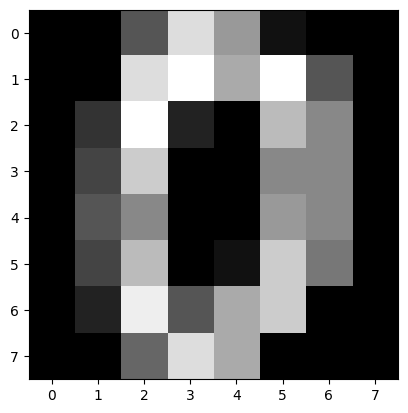

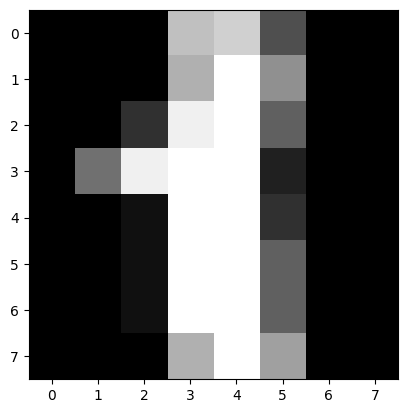

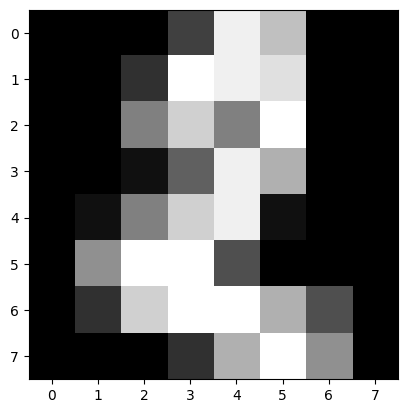

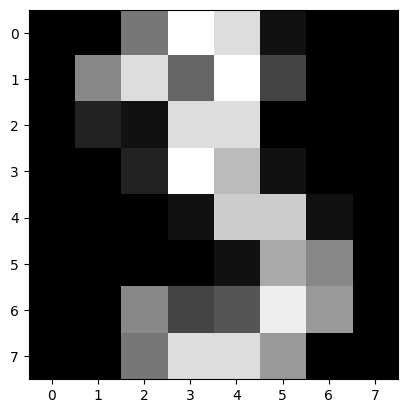

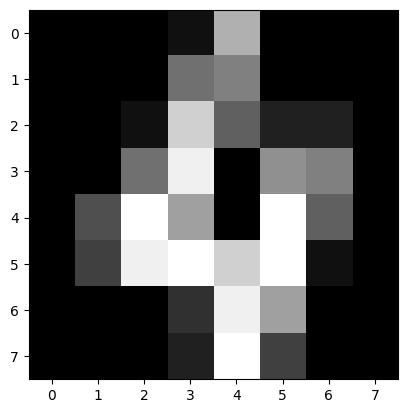

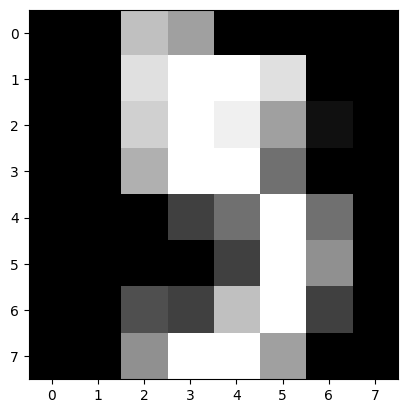

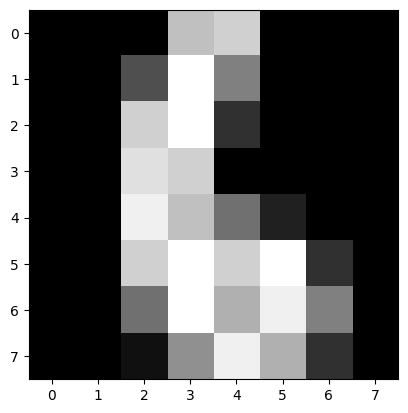

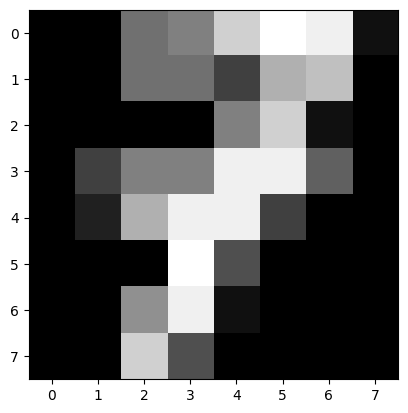

In [18]:
print(digits.data.shape)
print(digits.images.shape)
for i in np.arange(digits.images.shape[-1]):
    plt.imshow(digits.images[i], cmap='gray')
    plt.show()

In [20]:
# This is the tester to print out the volumne
print(volume)

1797


In [ ]:
# This cell is used for autograding. 

In [21]:
# Q2
# Determine the dimensionality here
# Your answer should be in this cell
# YOUR CODE HERE
dimensionality = digits.data.shape[1]

In [22]:
# This is the tester to print out the volumne
print(dimensionality)

64


In [ ]:
# This cell is used for autograding. 

### 3. Inspecting the Data

In the previous step, we have learnt the volume and dimensionality of the dataset. But how do the data look like in mathematical view and real lives? Understanding the form of data mathematically and in reality has great importance on model evaluation and model interpretation.


Let's print out the first data.

In [23]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Can you tell what's the digit in this image?  
From the output of the cell above, we can learn:  
- The first picture is storaged in an array which has 8 rows and 8 columns;
- The values in the array are all integers;
- The figure of the array is just as same as the picture of the dataset; ###
- The number of integers in this array is as same as the dimensionality we got in previous step.

This array is the mathematical form of images in Python. Every value in the array is one feature of the data.  
  
How can we convert this mathematical view into reality?

Here we introduce another useful package in Python, ***Matplotlib***.

***Matplotlib*** is one of the most useful visualization library in Python. matplotlib.pyplot is a collection of command style functions that make Matplotlib work like MATLAB. 
More information about matplotlib library at [matplotlib](https://matplotlib.org/api/index.html#the-pyplot-api).

- In the beginning of the assignment, we have used code `import matplotlib.pyplot as plt ` to import the matplotlib library.

- In ***Jupyter Notebook*** you have to use`%matplotlib inline`  to make the plot as the output of cells;

- After we imported the library, we can use the in-built function of matplotlib to transfer our data into images.

- In lecture7 we've already had an example about how to plot a face image.

- See the example from lecture7 below.

<img style="float:left" src="./example_plt.png" width = "50%">   


**Exercise**

**TO DO**: Extract the first image from the dataset and plot it as pictures. 

- Create a `first_data` variable and store the first image from the dataset here
- Call `plt.imshow` function to select and plot the pictures

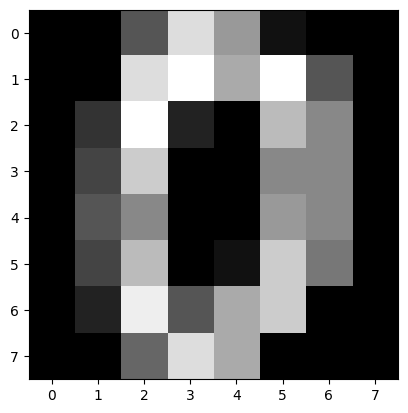

In [24]:
# Exercise
# Plot the first image in the dataset
# This exercise do not have any credit
# You can try in this cell
plt.imshow(digits.images[0], cmap=plt.cm.gray)

As we emphasized in the lecture, the data for supervise learning must have labels for the data. Understanding the labels is another crucial step in machine learning. Sometimes, we need to convert the labels from discrete variables into continuous varialbes.



***The digit dataset*** has an in-built function,***target*** ,can help us get the labels of the dataset easily.

 `digits.target` can give you all the labels of the dataset.

**TO DO**: Extract the first **5** labels from the dataset and print them out. 

- Using 'slicing' method to extract the first 5 labels from the dataset
- Print out the first 5 labels of the datset

In [37]:
# Q3
# extract the first five labels from the dataset 
# and assign them to variable 'labels'
# and print out in this cell
# Your answer should be in this cell
# YOUR CODE HERE
labels = digits.target[:5]

In [36]:
print(labels)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5]


In [ ]:
# This cell is used for autograding. 

### 4. Create Train Test Split

In assignment1, you've already split your dataset into training set and testing set. Let's do that again!  
 
 As the same in assignment1, use the **[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** &nbsp;function in sk-learn to split the dataset.
 
In the beginning of the assignment, we have used code `from sklearn.model_selection import train_test_split` to import the **train_test_split** function from sk-learn.

**TO DO**: Randomly split data into training and testing - **80% training, 20% testing**. Make sure your test/train split is random.

- Create a `X_train`, `X_test`, `Y_train`, `Y_test` variables 
- Call '**train_test_split**' function from sk-learn to split your dataset

In [40]:
# Q4
# Split the dataset into training set and testing set
# Your answer should be in this cell
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=27)

In [41]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1437, 64) (1437,) (360, 64) (360,)


In [ ]:
# This cell is used for autograding. 

###  5. Build Model

Logistic Regression is a basic classifier. Read more information about [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression). 

The code example about the logistic regression model from sk-learn library can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

- In the beginning of the assignment, we have used code `from sklearn.linear_model import LogisticRegression` to import the logistic regression model from sk-learn;  
- The step, building model(assign model to a varialbe) can be considered as creating a copy of logistic regression model from sk-learn;

**TO DO**: Import and assign the 'logistic regression' model from sk-learn

- Create a `logitsticReg` variable
- Assign the **'logistic regression'** model to variable `logitsticReg`

In [52]:
# Q5
# Assign the model to 'logisticReg'
# Your answer should be in this cell
# YOUR CODE HERE
logisticReg = LogisticRegression(max_iter=100000)

In [53]:
print(logisticReg)

LogisticRegression(max_iter=100000)


In [ ]:
# This cell is used for autograding. 

###  6. Train Model

After you assign logistic regression model to the local variable, you can train your model with the training data that you just split. 


**TO DO**: Call the `fit` function to train the model. Make sure that train the model with **training set**.

- Call the `fit` function

In [54]:
# Q6
# Train the model with training set
# Your answer should be in this cell

# YOUR CODE HERE
logisticReg.fit(X_train,Y_train)

LogisticRegression(max_iter=100000)

In [ ]:
# This cell is used for autograding. 

### 7. Evaluate model

The logistic regression model has learned parameter(weight) through training set. Now we can use testing set to evaluate how good this classifier is.

The ***score*** funtion can calculate the mean accuracy of the model easily.

**TO DO**: Call the `score` function to get the accuracy of the model. Make sure that you calculate the accuracy on your **testing** set.

- Call the `score` function

In [58]:
# Q7
# Evaluate your model with testing set
# Your answer should be in this cell

# YOUR CODE HERE
score = logisticReg.score(X_test, Y_test)

In [60]:
print(score)

0.9666666666666667


In [ ]:
# This cell is used for autograding. 

